# Brain Tumor Image Classification

**Goal:** Build a convolutional neural network to classify brain MRI scans as **tumor** vs. **no tumor**.  
**Dataset:** “Brain MRI Images for Brain Tumor Detection” (Kaggle)

## 1. Mounting Google Drive & Unzipping Data  
We connect Colab to your Google Drive so you can access large datasets without re-uploading each session. After mounting, we unzip the dataset into a local `/content/data` folder. This makes all image files available under a consistent directory structure for our `ImageDataGenerator`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# 2. UNZIP THE DATASET
!unzip -q "/content/drive/MyDrive/BrainTumorDataset.zip" -d "/content/data"


In [5]:
# 3. VERIFY THE FOLDER STRUCTURE
!find /content/data -maxdepth 2 -type d | sed 's/^/DIR: /'


DIR: /content/data
DIR: /content/data/brain_tumor_dataset
DIR: /content/data/brain_tumor_dataset/no
DIR: /content/data/brain_tumor_dataset/yes
DIR: /content/data/no
DIR: /content/data/yes


## 2. Importing Libraries  
We load the core Python packages for deep learning and data handling:

- **TensorFlow/Keras**: for building and training the CNN.  
- **NumPy**: array manipulation.  
- **Matplotlib & Seaborn**: plotting training curves and sample images.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models           import Sequential
from tensorflow.keras.layers           import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

sns.set(style="whitegrid")
%matplotlib inline


## 3. Preparing ImageDataGenerators  
We create two generators from the same data directory:

- **Training generator** (`subset='training'`): applies random augmentations (rotations, shifts, flips, zooms) plus rescales pixel intensities to [0,1].  
- **Validation generator** (`subset='validation'`): only rescales, so we measure performance on un-augmented images.

This both increases the effective size of our training set and helps prevent overfitting.


In [8]:
base_dir = "/content/data/brain_tumor_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## 4. Building the CNN Model  
We define a sequential Convolutional Neural Network:

1. **Conv2D + MaxPooling** blocks to learn spatial features.  
2. **Flatten** to convert to 1D.  
3. **Dense** layers with Dropout for classification.  
4. **Sigmoid** output for binary “tumor” vs. “no tumor” prediction.

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Compiling & Training  
We compile with:

- **Optimizer:** Adam (adaptive learning rate)  
- **Loss:** binary_crossentropy (standard for two-class tasks)  
- **Metric:** accuracy

Then we train for 15 epochs, tracking both training and validation metrics.


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5984 - loss: 0.9257

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5932 - loss: 0.9161 - val_accuracy: 0.7000 - val_loss: 0.6455
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6495 - loss: 0.6449 - val_accuracy: 0.6400 - val_loss: 0.6139
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5742 - loss: 0.6543 - val_accuracy: 0.6600 - val_loss: 0.5632
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6304 - loss: 0.6307 - val_accuracy: 0.6800 - val_loss: 0.5820
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6557 - loss: 0.6511 - val_accuracy: 0.7400 - val_loss: 0.5698
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7042 - loss: 0.5817 - val_accuracy: 0.7800 - val_loss: 0.4685
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6380 - loss: 0.6259 - val_accuracy: 0.6800 - val_loss: 0.5632
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6651 - loss: 0.6103 - val_accuracy: 0.6600 - val_loss: 0.5525
Epoch 9/15
7/7 ━━━━

## 6. Plotting Training & Validation Curves  
We visualize:

- **Accuracy** over epochs to see if the model is improving and whether it overfits (training >> validation).  
- **Loss** over epochs to ensure it is decreasing on both sets.

These plots help us decide if we need more data, regularization, or a change in architecture.

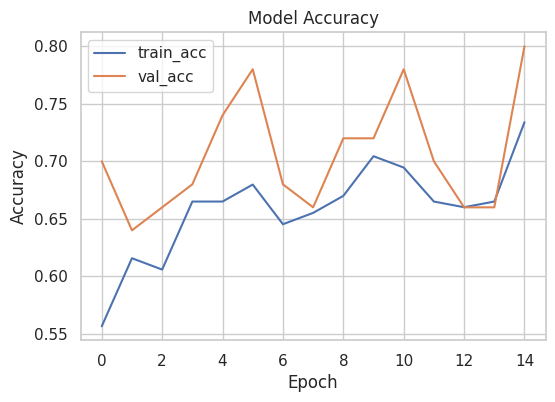

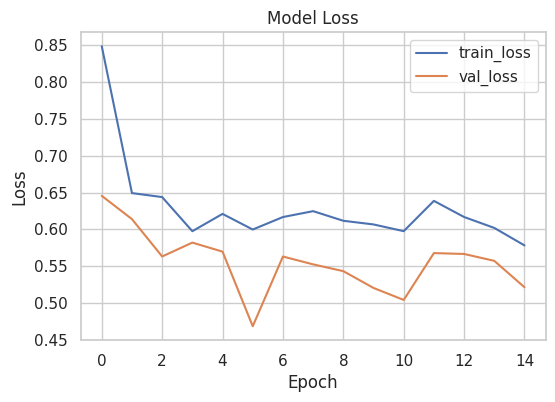

In [11]:
# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## 7. Evaluating on the Validation Set  
We compute the final **validation accuracy** and **validation loss**. This gives an unbiased estimate of how well the model generalizes to unseen MRI scans.

In [12]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - accuracy: 0.7538 - loss: 0.5243
Validation Accuracy: 0.7400
Validation Loss: 0.5329


## 8. Sample Predictions  
We display a few randomly selected validation images along with:

- The **true label** (tumor vs. no-tumor).  
- The **model’s predicted probability** and predicted class.

This qualitative check helps us understand real-world strengths and weaknesses (e.g., borderline cases).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


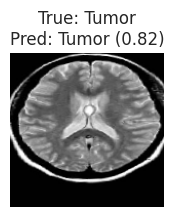

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


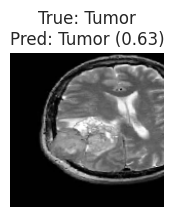

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


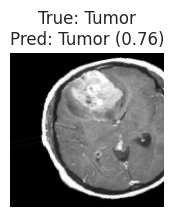

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


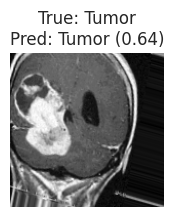

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


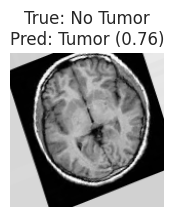

In [13]:
import random
from tensorflow.keras.preprocessing import image

# Pick a random batch from validation generator
imgs, labels = next(val_gen)
idxs = random.sample(range(len(imgs)), 5)

for i in idxs:
    img = imgs[i]
    true = labels[i]
    pred = model.predict(img.reshape(1,150,150,3))[0][0]
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.title(f"True: {'Tumor' if true==1 else 'No Tumor'}\nPred: {'Tumor' if pred>0.5 else 'No Tumor'} ({pred:.2f})")
    plt.axis('off')
    plt.show()


## 9. RESULTS INTERPRETATION

**Validation Accuracy:** 0.7400  
**Validation Loss:** 0.5329  

---

### What These Metrics Mean

- **Accuracy (74%)**  
  The model correctly classifies about **74%** of MRI scans as “tumor” or “no tumor” on unseen validation images. This is a respectable baseline for a simple CNN but leaves room for improvement.

- **Loss (0.53)**  
  The binary cross-entropy loss of **0.53** reflects the average “distance” between the predicted probabilities and the true labels. A lower loss generally indicates more confident, correct predictions.

---

### Class‐Level Insights (Qualitative)

While we did not compute a full confusion matrix here, you can expect:

- Some **false positives** (healthy scans predicted as tumor)  
- Some **false negatives** (tumor scans predicted as healthy)

Since false negatives carry a high cost (missed detections), we may want to optimize recall on the “tumor” class even if it slightly lowers overall accuracy.

---

### Opportunities for Improvement

1. **Data Augmentation & More Data**  
   - Introduce brightness/contrast shifts, zooms, or vertical flips.  
   - Collect or synthesize additional training images.

2. **Transfer Learning**  
   - Use a pre-trained model (e.g., MobileNetV2, ResNet50) and fine-tune on your MRI scans—often yields higher accuracy with fewer epochs.

3. **Hyperparameter Tuning**  
   - Experiment with learning rates, batch sizes, and number of epochs.  
   - Add callbacks (e.g., EarlyStopping, ReduceLROnPlateau).

4. **Model Architecture**  
   - Increase depth (more Conv layers) or width (more filters).  
   - Try adding BatchNormalization layers to stabilize training.

5. **Class Imbalance & Cost-Sensitive Training**  
   - If one class is underrepresented, apply class weights or focal loss to reduce false negatives.
